In [5]:
import tpot

### sample data (https://compas.lh.or.kr/subj/past/data?subjNo=SBJ_1910_002 / 김해시 화재발생 데이터 : 화재발생 예측)

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tpot import TPOTClassifier
from sklearn.preprocessing import LabelEncoder
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.pipeline import make_pipeline, make_union
# from sklearn.tree import DecisionTreeClassifier
# from tpot.builtins import StackingEstimator
# from tpot.export_utils import set_param_recursive

c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
train_data=pd.read_csv('C:/Users/USER/Desktop/Side/AutoML/sample data/SBJ_1910_002/train.csv')
test_data=pd.read_csv('C:/Users/USER/Desktop/Side/AutoML/sample data/SBJ_1910_002/test.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_44848\1879564099.py:1: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data=pd.read_csv('C:/Users/USER/Desktop/Side/AutoML/sample data/SBJ_1910_002/train.csv')


In [3]:
#X,feature split
target=train_data['fr_yn']
data=train_data.drop(['fr_yn','dt_of_fr','bldng_us',
 'bldng_archtctr',
 'dt_of_athrztn',
 'bldng_us_clssfctn',
 'jmk',
 'rgnl_ar_nm',
 'rgnl_ar_nm2',
 'lnd_us_sttn_nm',
 'rd_sd_nm',
 'emd_nm',
 'mlt_us_yn',
 'trgt_crtr',
 'fr_fghtng_fclt_spcl_css_5_yn',
 'fr_fghtng_fclt_spcl_css_6_yn',
 'us_yn',
 'dngrs_thng_yn',
 'slf_fr_brgd_yn',
 'blk_dngrs_thng_mnfctr_yn',
 'cltrl_hrtg_yn'],axis=1) #변수 제거 object 도

N    51542
Y     7657
Name: fr_yn, dtype: int64

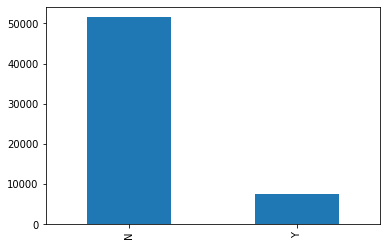

In [4]:
 #target 분포 확인
pd.value_counts(target).plot.bar()

target.value_counts()

In [5]:

target= target.replace({'N':0}).replace({'Y':1})


In [11]:
list(data.columns)

['bldng_cnt',
 'bldng_ar',
 'ttl_ar',
 'lnd_ar',
 'ttl_grnd_flr',
 'ttl_dwn_flr',
 'tmprtr',
 'prcpttn',
 'wnd_spd',
 'wnd_drctn',
 'hmdt',
 'gas_engry_us_201401',
 'ele_engry_us_201401',
 'gas_engry_us_201402',
 'ele_engry_us_201402',
 'gas_engry_us_201403',
 'ele_engry_us_201403',
 'gas_engry_us_201404',
 'ele_engry_us_201404',
 'gas_engry_us_201405',
 'ele_engry_us_201405',
 'gas_engry_us_201406',
 'ele_engry_us_201406',
 'gas_engry_us_201407',
 'ele_engry_us_201407',
 'gas_engry_us_201408',
 'ele_engry_us_201408',
 'gas_engry_us_201409',
 'ele_engry_us_201409',
 'gas_engry_us_201410',
 'ele_engry_us_201410',
 'gas_engry_us_201411',
 'ele_engry_us_201411',
 'gas_engry_us_201412',
 'ele_engry_us_201412',
 'gas_engry_us_201501',
 'ele_engry_us_201501',
 'gas_engry_us_201502',
 'ele_engry_us_201502',
 'gas_engry_us_201503',
 'ele_engry_us_201503',
 'gas_engry_us_201504',
 'ele_engry_us_201504',
 'gas_engry_us_201505',
 'ele_engry_us_201505',
 'gas_engry_us_201506',
 'ele_engry_us_20150

In [6]:
#X_train split 확인
X_train, X_test, y_train, y_test = train_test_split(data,target, train_size=0.75, test_size=0.25, random_state=42)

#scoring      

'accuracy', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy',
'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_median_absolute_error', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted',

In [7]:
tpot=TPOTClassifier(generations=5, population_size=60,verbosity=2,random_state=42,scoring='precision')   # 시간지정을 해주지 않았음
tpot.fit(X_train,y_train)  

Imputing missing values in feature set


Optimization Progress:   0%|          | 0/360 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9012009267328416

Generation 2 - Current best internal CV score: 0.9034955156127964

Generation 3 - Current best internal CV score: 0.9097358197358197

Generation 4 - Current best internal CV score: 0.9097358197358197

Generation 5 - Current best internal CV score: 0.9097358197358197

Best pipeline: LinearSVC(FeatureAgglomeration(input_matrix, affinity=l1, linkage=average), C=0.1, dual=False, loss=squared_hinge, penalty=l1, tol=0.01)


TPOTClassifier(generations=5, population_size=60, random_state=42,
               scoring='precision', verbosity=2)

In [8]:
print(tpot.score(X_test, y_test))

Imputing missing values in feature set
0.9696969696969697


c:\Users\USER\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_scorer.py:765: FutureWarning: sklearn.metrics.SCORERS is deprecated and will be removed in v1.3. Please use sklearn.metrics.get_scorer_names to get a list of available scorers and sklearn.metrics.get_metric to get scorer.
  warnings.warn(


In [17]:
# Show the final model
print(tpot.fitted_pipeline_)

Pipeline(steps=[('featureagglomeration',
                 FeatureAgglomeration(affinity='l1', linkage='average')),
                ('linearsvc',
                 LinearSVC(C=0.1, dual=False, penalty='l1', random_state=42,
                           tol=0.01))])


In [18]:
# Export the pipeline as a python script file
tpot.export('C:/Users/USER/Desktop/Side/AutoML/tpot_exported_pipeline_classification.py')

pipeline을 가지고 다시 재학습

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import FeatureAgglomeration
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.impute import SimpleImputer
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

imputer = SimpleImputer(strategy="median")
imputer.fit(training_features)
training_features = imputer.transform(training_features)
testing_features = imputer.transform(testing_features)

# Average CV score on the training set was: 0.9097358197358197
exported_pipeline = make_pipeline(
    FeatureAgglomeration(affinity="l1", linkage="average"),
    LinearSVC(C=0.1, dual=False, loss="squared_hinge", penalty="l1", tol=0.01)
)
# Fix random state for all the steps in exported pipeline
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

exported_pipeline.fit(training_features, training_target)
results = exported_pipeline.predict(testing_features)


###classification object 변수 포함 학습(label en)

In [6]:
train_data2=pd.read_csv('C:/Users/USER/Desktop/Side/AutoML/sample data/SBJ_1910_002/train.csv')
test_data2=pd.read_csv('C:/Users/USER/Desktop/Side/AutoML/sample data/SBJ_1910_002/test.csv')

C:\Users\USER\AppData\Local\Temp\ipykernel_1856\3540925956.py:1: DtypeWarning: Columns (8,172,173,174,175,176,177,178,179) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data2=pd.read_csv('C:/Users/USER/Desktop/Side/AutoML/sample data/SBJ_1910_002/train.csv')


feature engineering

In [7]:
train_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59199 entries, 0 to 59198
Columns: 180 entries, dt_of_fr to cltrl_hrtg_yn
dtypes: float64(147), int64(12), object(21)
memory usage: 81.3+ MB


In [8]:
#X,feature split
target2=train_data2['fr_yn']

data2=train_data2.drop(['fr_yn','dt_of_fr'],axis=1) # label, Timeseries 제거

In [9]:
# object 변수만
print(data2.info())
data_dtype=data2.apply(lambda x: x.dtype)
categ=list(data_dtype[data_dtype=='object'].index)
categ

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59199 entries, 0 to 59198
Columns: 178 entries, bldng_us to cltrl_hrtg_yn
dtypes: float64(147), int64(12), object(19)
memory usage: 80.4+ MB
None


['bldng_us',
 'bldng_archtctr',
 'dt_of_athrztn',
 'bldng_us_clssfctn',
 'jmk',
 'rgnl_ar_nm',
 'rgnl_ar_nm2',
 'lnd_us_sttn_nm',
 'rd_sd_nm',
 'emd_nm',
 'mlt_us_yn',
 'trgt_crtr',
 'fr_fghtng_fclt_spcl_css_5_yn',
 'fr_fghtng_fclt_spcl_css_6_yn',
 'us_yn',
 'dngrs_thng_yn',
 'slf_fr_brgd_yn',
 'blk_dngrs_thng_mnfctr_yn',
 'cltrl_hrtg_yn']

In [10]:
#train,test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(data2,target2, train_size=0.75, test_size=0.25, random_state=42)

In [11]:
X_train2

,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,bldng_us_clssfctn,...,no_tbc_zn_dstnc,bldng_cnt_in_50m,trgt_crtr,fr_fghtng_fclt_spcl_css_5_yn,fr_fghtng_fclt_spcl_css_6_yn,us_yn,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn
13524,NaN,NaN,5,0.00,0.00,0.0,NaN,NaN,NaN,NaN,...,1232,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18237,NaN,NaN,4,0.00,0.00,0.0,NaN,NaN,NaN,NaN,...,659,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12146,NaN,NaN,7,72.73,72.73,0.0,NaN,1.0,0.0,NaN,...,1038,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54473,제2종근린생활시설,경량철골구조,6,274.74,274.74,29020.0,20011010.0,1.0,0.0,상업용,...,2765,0,NaN,N,N,N,N,N,N,N
48394,NaN,NaN,5,0.00,0.00,0.0,NaN,NaN,NaN,NaN,...,651,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,공장,일반철골구조,3,4474.65,4425.33,0.0,19721127.0,3.0,0.0,공업용,...,88,37,일반대상물,N,N,N,N,N,N,N
38158,NaN,NaN,7,0.00,0.00,0.0,NaN,NaN,NaN,NaN,...,330,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
860,NaN,NaN,4,193.52,193.52,722.0,NaN,2.0,0.0,NaN,...,7547,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15795,노유자시설,철근콘크리트구조,3,254.15,534.71,793.0,19780620.0,3.0,0.0,문교사회용,...,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44399 entries, 13524 to 56422
Columns: 178 entries, bldng_us to cltrl_hrtg_yn
dtypes: float64(147), int64(12), object(19)
memory usage: 60.6+ MB


In [78]:
X_test2

,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,ttl_dwn_flr,bldng_us_clssfctn,...,no_tbc_zn_dstnc,bldng_cnt_in_50m,trgt_crtr,fr_fghtng_fclt_spcl_css_5_yn,fr_fghtng_fclt_spcl_css_6_yn,us_yn,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn
51386,단독주택,경량철골구조,1,92.29,92.29,514.0,20161006.0,1.0,0.0,주거용,...,3446,1,일반대상물,NaN,NaN,Y,N,N,N,N
18247,NaN,NaN,1,0.00,0.00,0.0,NaN,NaN,NaN,NaN,...,704,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53674,제2종근린생활시설,철근콘크리트구조,1,143.49,512.33,244.9,20160912.0,5.0,0.0,상업용,...,334,28,NaN,NaN,NaN,Y,N,N,N,N
45704,제2종근린생활시설,벽돌구조,2,282.60,282.60,420.6,19931004.0,NaN,NaN,NaN,...,208,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11625,NaN,NaN,4,67.45,128.66,0.0,NaN,2.0,0.0,NaN,...,50,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9410,단독주택,블록구조,3,126.08,126.08,424.0,19870301.0,1.0,0.0,주거용,...,494,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58552,공장,일반철골구조,17,13887.76,14711.84,0.0,197912.0,13.0,1.0,공업용,...,289,22,일반대상물,N,N,N,N,N,N,N
20525,단독주택,벽돌구조,1,103.50,164.43,0.0,19871218.0,2.0,0.0,주거용,...,274,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22779,판매시설,철근콘크리트구조,3,930.40,930.40,1467.0,19860204.0,1.0,0.0,상업용,...,319,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
X_test2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14800 entries, 51386 to 12469
Columns: 178 entries, bldng_us to cltrl_hrtg_yn
dtypes: float64(147), int64(12), object(19)
memory usage: 20.2+ MB


In [16]:
X_train2['bldng_us'].unique()

array([nan, '제2종근린생활시설', '단독주택', '동.식물 관련시설', '공동주택', '공장', '업무시설',
       '숙박시설', '제1종근린생활시설', '위험물저장및처리시설', '분뇨.쓰레기처리시설', '창고시설', '종교시설',
       '수련시설', '노유자시설', '판매시설', '위락시설', '자동차관련시설', '운동시설', '근린생활시설',
       '교육연구시설', '발전시설', '운수시설', '관광휴게시설', '문화및집회시설', '교정및군사시설', '장례식장',
       '묘지관련시설', '교육연구및복지시설', '의료시설', '파출소', '방송통신시설', '공공용시설', '판매및영업시설'],
      dtype=object)

In [17]:
X_test2['bldng_us'].unique()

array(['단독주택', nan, '제2종근린생활시설', '동.식물 관련시설', '공장', '공동주택', '창고시설',
       '제1종근린생활시설', '교육연구및복지시설', '교육연구시설', '노유자시설', '종교시설', '숙박시설',
       '업무시설', '관광휴게시설', '위험물저장및처리시설', '판매시설', '문화및집회시설', '자동차관련시설',
       '운동시설', '위락시설', '분뇨.쓰레기처리시설', '묘지관련시설', '근린생활시설', '수련시설', '발전시설',
       '의료시설', '방송통신시설', '시장', '운수시설'], dtype=object)

In [18]:
# object 변환 (label encoder object all columns)
from sklearn.preprocessing import LabelEncoder


for feat in categ:
    print(feat)
    le = LabelEncoder()
    le.fit(X_train2[feat].astype(str))
    X_train2[feat] = le.transform(X_train2[feat].astype(str))


    #test set label encoding
    X_test2[feat]= ['nan' if not i in le.classes_ else i for i in X_test2[feat] ]
    X_test2[feat] = le.transform(X_test2[feat].astype(str))

    print(le.classes_)


bldng_us
['nan' '공공용시설' '공동주택' '공장' '관광휴게시설' '교육연구및복지시설' '교육연구시설' '교정및군사시설'
 '근린생활시설' '노유자시설' '단독주택' '동.식물 관련시설' '묘지관련시설' '문화및집회시설' '발전시설' '방송통신시설'
 '분뇨.쓰레기처리시설' '수련시설' '숙박시설' '업무시설' '운동시설' '운수시설' '위락시설' '위험물저장및처리시설'
 '의료시설' '자동차관련시설' '장례식장' '제1종근린생활시설' '제2종근린생활시설' '종교시설' '창고시설' '파출소'
 '판매및영업시설' '판매시설']
bldng_archtctr
['nan' '강파이프구조' '경량철골구조' '기타강구조' '기타구조' '기타조적구조' '기타콘크리트구조' '목구조' '벽돌구조'
 '블록구조' '석구조' '일반목구조' '일반철골구조' '조적구조' '철골철근콘크리트구조' '철골콘크리트구조' '철근콘크리트구조'
 '통나무구조' '프리케스트콘크리트구조']
dt_of_athrztn
['1740.0' '17510301.0' '17900101.0' ... '9800808.0' '9820930.0' 'nan']
bldng_us_clssfctn
['nan' '공공용' '공업용' '기타' '농수산용' '문교사회용' '상업용' '주거용']
jmk
['공' '과' '구' '답' '대' '도' '목' '묘' '사' '수' '양' '원' '유' '임' '잡' '장' '전' '제'
 '종' '주' '차' '창' '천' '철' '체' '학']
rgnl_ar_nm
['nan' '개발제한구역' '계획관리지역' '관리지역' '근린상업지역' '농림지역' '보전관리지역' '보전녹지지역' '생산관리지역'
 '생산녹지지역' '용도미지정' '유통상업지역' '일반공업지역' '일반상업지역' '자연녹지지역' '자연환경보전지역'
 '제1종일반주거지역' '제1종전용주거지역' '제2종일반주거지역' '제2종전용주거지역' '제3종일반주거지역' '준공업지역'
 '준주거지역' '중심상업지역']
rgnl_

In [19]:

print (X_train2.info())
print (X_test2.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44399 entries, 13524 to 56422
Columns: 178 entries, bldng_us to cltrl_hrtg_yn
dtypes: float64(147), int32(19), int64(12)
memory usage: 57.4 MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14800 entries, 51386 to 12469
Columns: 178 entries, bldng_us to cltrl_hrtg_yn
dtypes: float64(147), int32(19), int64(12)
memory usage: 19.1 MB
None


In [20]:
X_train2[categ]

,bldng_us,bldng_archtctr,dt_of_athrztn,bldng_us_clssfctn,jmk,rgnl_ar_nm,rgnl_ar_nm2,lnd_us_sttn_nm,rd_sd_nm,emd_nm,mlt_us_yn,trgt_crtr,fr_fghtng_fclt_spcl_css_5_yn,fr_fghtng_fclt_spcl_css_6_yn,us_yn,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn
13524,0,0,9554,0,13,14,19,31,8,204,0,1,1,1,3,2,1,2,2
18237,0,0,9554,0,4,2,19,12,7,102,0,1,1,1,3,2,1,2,2
12146,0,0,9554,0,4,2,19,12,8,162,0,1,1,1,3,2,1,2,2
54473,28,2,6200,6,18,6,19,33,8,102,0,1,0,0,0,0,0,0,0
48394,0,0,9554,0,4,2,19,12,7,342,0,1,1,1,3,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54343,3,12,918,2,15,12,19,6,10,143,0,10,0,0,0,0,0,0,0
38158,0,0,9554,0,4,18,19,12,8,215,0,1,1,1,3,2,1,2,2
860,0,0,9554,0,4,16,19,12,8,123,0,1,1,1,3,2,1,2,2
15795,9,16,1431,5,4,18,19,35,10,22,0,1,1,1,3,2,1,2,2


In [21]:
X_test2[categ]

,bldng_us,bldng_archtctr,dt_of_athrztn,bldng_us_clssfctn,jmk,rgnl_ar_nm,rgnl_ar_nm2,lnd_us_sttn_nm,rd_sd_nm,emd_nm,mlt_us_yn,trgt_crtr,fr_fghtng_fclt_spcl_css_5_yn,fr_fghtng_fclt_spcl_css_6_yn,us_yn,dngrs_thng_yn,slf_fr_brgd_yn,blk_dngrs_thng_mnfctr_yn,cltrl_hrtg_yn
51386,10,2,9554,7,4,8,19,32,4,214,0,10,1,1,2,0,0,0,0
18247,0,0,9554,0,2,0,0,0,0,202,0,1,1,1,3,2,1,2,2
53674,28,16,9554,6,4,18,19,39,9,243,0,1,1,1,2,0,0,0,0
45704,28,8,9554,0,4,13,19,20,10,244,0,1,1,1,3,2,1,2,2
11625,0,0,9554,0,4,18,19,12,10,111,0,1,1,1,3,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9410,10,9,9554,7,4,2,19,12,10,60,0,1,1,1,3,2,1,2,2
58552,3,12,9554,2,15,12,19,6,1,68,0,10,0,0,0,0,0,0,0
20525,10,8,9554,7,4,17,19,12,10,242,0,1,1,1,3,2,1,2,2
22779,33,16,9554,6,14,13,19,20,9,345,0,1,1,1,3,2,1,2,2


N    38723
Y     5676
Name: fr_yn, dtype: int64

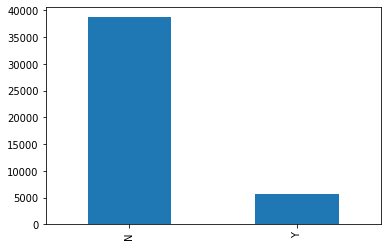

In [22]:
 #target 분포 확인
pd.value_counts(y_train2).plot.bar()

y_train2.value_counts()

In [23]:
y_train2= y_train2.replace({'N':0}).replace({'Y':1})

In [24]:
tpot2=TPOTClassifier( population_size=20,verbosity=2,random_state=42,scoring='accuracy',cv=5)   #,max_time_mins = 480
tpot2.fit(X_train2,y_train2)  

Imputing missing values in feature set


Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8937588717786376

Generation 2 - Current best internal CV score: 0.8941642822572545

Generation 3 - Current best internal CV score: 0.8941642822572545

Generation 4 - Current best internal CV score: 0.8943895150922969

Generation 5 - Current best internal CV score: 0.8945021353147269

Best pipeline: XGBClassifier(VarianceThreshold(input_matrix, threshold=0.1), learning_rate=0.1, max_depth=6, min_child_weight=9, n_estimators=100, n_jobs=1, subsample=0.9500000000000001, verbosity=0)


TPOTClassifier(generations=5, population_size=20, random_state=42,
               scoring='accuracy', verbosity=2)

In [27]:
print(tpot.score(X_test, y_test))

AttributeError: module 'tpot' has no attribute 'score'

In [ ]:
# Export the pipeline as a python script file
tpot.export('C:/Users/USER/Desktop/Side/AutoML/tpot_exported_pipeline_classification_wln.py')

NameError: name 'tpot' is not defined